<a href="https://colab.research.google.com/github/C-Sophrosyne/R-projects/blob/main/An%C3%A1lise_de_Comb%C3%BAstivel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(readr)

In [2]:
link_anp <- paste0("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/qus/ultimas-4-semanas-gasolina-etanol.csv"
)

In [3]:
dados_brutos <- readr::read_csv2(link_anp)
head(dados_brutos)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 50165 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (14): Regiao - Sigla, Estado - Sigla, Municipio, Revenda, CNPJ da Revend...
dbl  (1): Valor de Venda
lgl  (1): Valor de Compra

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>
SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS DE PETROLEO LTDA,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NA,JARDIM ZULMIRA,18061-000,GASOLINA,05/02/2024,4.78,NA,R$ / litro,BRANCA
SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS DE PETROLEO LTDA,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NA,JARDIM ZULMIRA,18061-000,ETANOL,05/02/2024,2.99,NA,R$ / litro,BRANCA
N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NA,25 DE AGOSTO,69980-000,GASOLINA,07/02/2024,7.45,NA,R$ / litro,VIBRA
N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NA,COPACABANA,69980-000,GASOLINA,07/02/2024,7.45,NA,R$ / litro,IPIRANGA
N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NA,COPACABANA,69980-000,GASOLINA ADITIVADA,07/02/2024,7.55,NA,R$ / litro,IPIRANGA
N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NA,COPACABANA,69980-000,ETANOL,07/02/2024,5.79,NA,R$ / litro,IPIRANGA


In [6]:
# Preço da gasolina em São Paulo
dados_sp <- dados_brutos |>
dplyr::filter(
`Estado - Sigla` == "SP",
Municipio == "SAO PAULO",
Produto == "GASOLINA"
) |>
dplyr::mutate(data = lubridate::dmy(`Data da Coleta`)) |>
dplyr::select(
-c(
"Produto",
"Valor de Compra",
"Unidade de Medida",
"Municipio",
"Estado - Sigla", "Regiao - Sigla",
"Data da Coleta"
)
)
head(dados_sp)

Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Valor de Venda,Bandeira,data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<date>
SANTA FE COMERCIO VAREJISTA DE COMBUSTIVEIS LTDA,07.680.491/0001-08,RUA LEOPOLDO DE PASSOS LIMA,292,NA,JARDIM SANTA FE,05271-000,5.89,BRANCA,2024-02-06
AUTO POSTO NOVO ATO LTDA,07.152.484/0001-33,RUA TERESA BERTOZZI GIANNINI,320,-,JARDIM DRACENA,05528-190,5.79,BRANCA,2024-02-05
COREL AUTO POSTO EIRELI,07.812.617/0001-50,AVENIDA ENGENHEIRO HEITOR ANTONIO EIRAS GARCIA,419,NA,JARDIM ESMERALDA,05588-000,5.79,VIBRA,2024-02-05
AUTO POSTO CAVALLARI LTDA,04.885.965/0001-60,AVENIDA NOSSA SENHORA DO O,1145,NA,FREGUESIA DO Ó,02715-000,5.46,IPIRANGA,2024-02-05
CENTRO AUTOMOTIVO C.V.M LTDA,07.672.729/0001-53,RUA CAIO GRACO,263,NA,VILA ROMANA,05044-000,4.94,BRANCA,2024-02-05
PENINHA AUTO POSTO LTDA,03.466.641/0001-24,RUA ITAJUIBE,671,NA,JARDIM IDA GUEDES,08120-470,5.59,BRANCA,2024-02-06


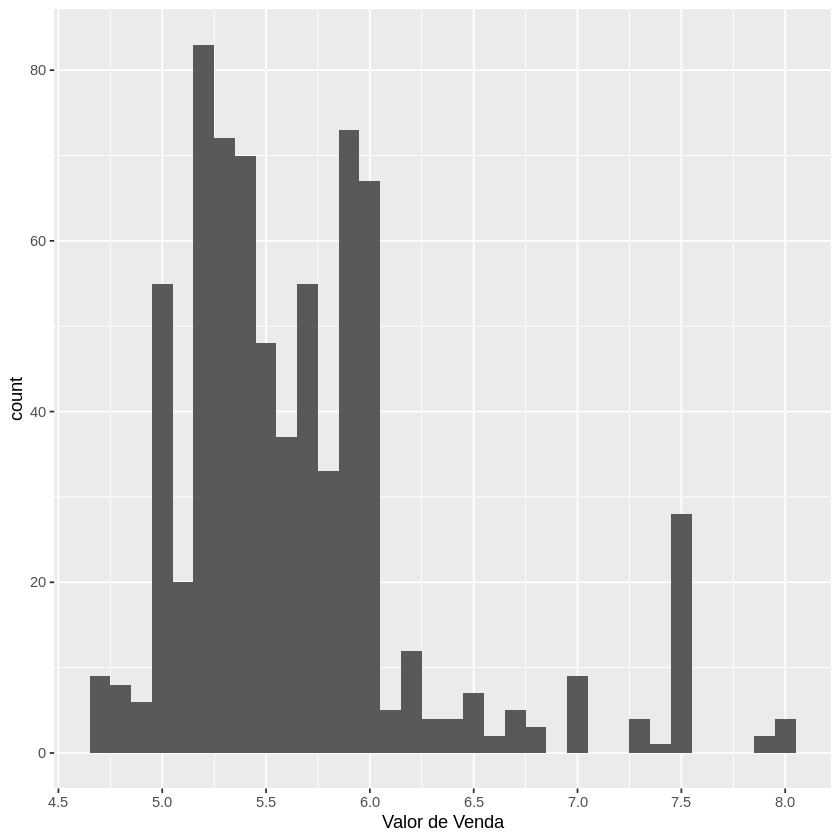

In [18]:
dados_sp |>
ggplot2::ggplot() +
ggplot2::aes(x = `Valor de Venda`) +
ggplot2::geom_histogram(binwidth = 0.1) +
ggplot2::scale_x_continuous(n.breaks = 10)

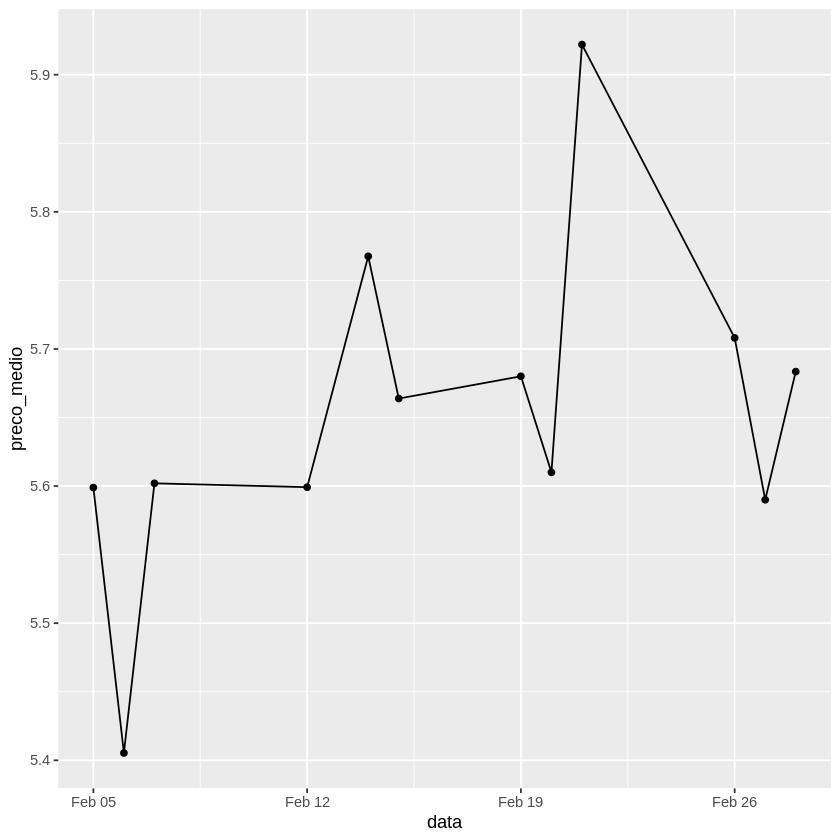

In [19]:
dados_sp |>
dplyr::summarise(preco_medio = mean(`Valor de Venda`, na.rm = TRUE), .by = data) |>
ggplot2::ggplot() +
ggplot2::aes(x = data, y = preco_medio) +
ggplot2::geom_line()+
ggplot2::geom_point()

In [ ]:
# Menor preço 5.40/l